In [3]:
!git clone https://github.com/Chethana-16/Deep-Learning-project.git

Cloning into 'Deep-Learning-project'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 0), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 833.42 KiB | 2.02 MiB/s, done.


# EDA
We will take many steps to prepare for a K-Nearest Neighbors (KNN) classifier and do exploratory data analysis (EDA) using Python for a dataset including emotive text data. The procedures involve data inspection, label distribution analysis, word frequency visualization, and text analysis utilizing natural language processing (NLP) methods. An organized method to accomplish this is as follows:

# 1. Load and Inspect Data
First, ensure the data is loaded correctly and understand its basic structure.

In [1]:
import pandas as pd

# Load data
train = pd.read_csv('../Deep-Learning-project/dataset/training.csv')
test = pd.read_csv('../Deep-Learning-project/dataset/test.csv')
validation = pd.read_csv('../Deep-Learning-project/dataset/validation.csv')

# Display the first few rows of the training data
print(train.head())
print(train.info())

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None


# 2. Preprocess Data
Before applying NLP techniques, it's necessary to preprocess the text data.

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokenized = word_tokenize(text)  # tokenize text
    cleaned_text = [word for word in tokenized if word not in stopwords.words('english')]  # remove stopwords
    return " ".join(cleaned_text)

# Apply preprocessing
train['cleaned_text'] = train['text'].apply(preprocess_text)
labels_dict = {0:'sad', 1:'happy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['emotion'] = train['label'].map(labels_dict )


test['cleaned_text'] = test['text'].apply(preprocess_text)
labels_dict = {0:'sad', 1:'happy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
test['emotion'] = test['label'].map(labels_dict )


validation['cleaned_text'] = validation['text'].apply(preprocess_text)
labels_dict = {0:'sad', 1:'happy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
validation['emotion'] = validation['label'].map(labels_dict )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chethanats/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chethanats/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
test.head()

,text,label,cleaned_text,emotion
0,im feeling rather rotten so im not very ambiti...,0,im feeling rather rotten im ambitious right,sad
1,im updating my blog because i feel shitty,0,im updating blog feel shitty,sad
2,i never make her separate from me because i do...,0,never make separate ever want feel like ashamed,sad
3,i left with my bouquet of red and yellow tulip...,1,left bouquet red yellow tulips arm feeling sli...,happy
4,i was feeling a little vain when i did this one,0,feeling little vain one,sad


In [5]:
train.head()

,text,label,cleaned_text,emotion
0,i didnt feel humiliated,0,didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...,sad
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...,love
4,i am feeling grouchy,3,feeling grouchy,anger


In [3]:
validation.head()

,text,label,cleaned_text,emotion
0,im feeling quite sad and sorry for myself but ...,0,im feeling quite sad sorry ill snap soon,sad
1,i feel like i am still looking at a blank canv...,0,feel like still looking blank canvas blank pie...,sad
2,i feel like a faithful servant,2,feel like faithful servant,love
3,i am just feeling cranky and blue,3,feeling cranky blue,anger
4,i can have for a treat or if i am feeling festive,1,treat feeling festive,happy


# 3. Visualize Data
## a. Label Distribution
Visualize the distribution of labels in the training set to understand how balanced the dataset is.

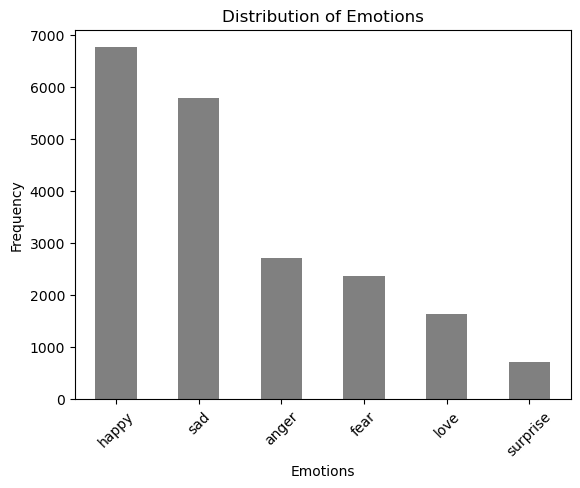

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate emotion data from all three sets
all_emotions = pd.concat([train['emotion'], test['emotion'], validation['emotion']])

# Visualize label distribution
all_emotions.value_counts().plot(kind='bar', color='gray')  
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

## b. Word Frequency Analysis
Use NLP techniques to visualize the 50 most frequent words.

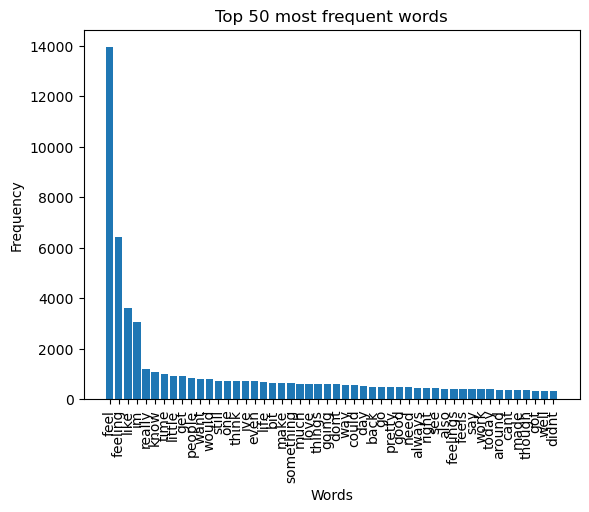

[('feel', 13938),
 ('feeling', 6431),
 ('like', 3616),
 ('im', 3055),
 ('really', 1182),
 ('know', 1080),
 ('time', 993),
 ('little', 932),
 ('get', 926),
 ('people', 839),
 ('want', 802),
 ('would', 798),
 ('still', 740),
 ('one', 739),
 ('think', 726),
 ('ive', 723),
 ('even', 717),
 ('life', 678),
 ('bit', 642),
 ('make', 639),
 ('something', 630),
 ('much', 618),
 ('love', 617),
 ('things', 607),
 ('going', 606),
 ('dont', 596),
 ('way', 571),
 ('could', 567),
 ('day', 540),
 ('back', 498),
 ('go', 493),
 ('pretty', 491),
 ('good', 481),
 ('need', 477),
 ('always', 453),
 ('right', 444),
 ('see', 440),
 ('also', 423),
 ('feelings', 419),
 ('feels', 416),
 ('say', 416),
 ('work', 407),
 ('today', 407),
 ('around', 382),
 ('cant', 376),
 ('made', 368),
 ('though', 365),
 ('got', 347),
 ('well', 344),
 ('didnt', 334)]

In [5]:
from collections import Counter

all_text = pd.concat([train['cleaned_text'], test['cleaned_text'], validation['cleaned_text']])

# Count word frequency
word_freq = Counter(" ".join(all_text).split()).most_common(50)

# Plot word frequencies
words, counts = zip(*word_freq)
plt.bar(words, counts)
plt.title('Top 50 most frequent words')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
word_freq

# 4. Feature Extraction for KNN
Transform the text data into numerical data that a KNN classifier can use.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF model
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['cleaned_text'])
y_train = train['emotion']

# Inspect the shape of the resulting data
print(X_train.shape)

(16000, 15044)


# 5. Train KNN Classifier
Train a KNN classifier using the features extracted.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 6. Evaluate the Classifier
Evaluate the classifier on the validation set.

In [19]:
# Transform the validation text data
X_validation = vectorizer.transform(validation['cleaned_text'])
y_validation = validation['emotion']

# Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report
predictions = knn.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.806
              precision    recall  f1-score   support

       anger       0.78      0.84      0.81       275
        fear       0.72      0.73      0.72       212
       happy       0.82      0.87      0.84       704
        love       0.85      0.57      0.68       178
         sad       0.82      0.86      0.84       550
    surprise       0.80      0.51      0.62        81

    accuracy                           0.81      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.81      0.81      0.80      2000



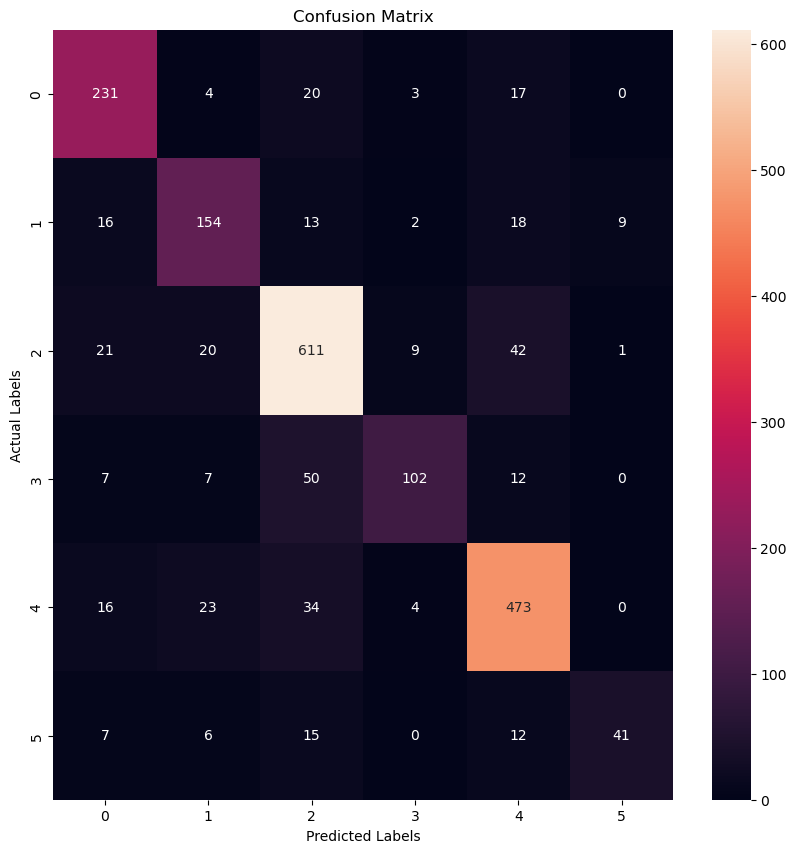

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assume y_validation is true labels and predictions is what your model predicted
cm = confusion_matrix(y_validation, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

here, 
Class 0: The model predicted 231 instances correctly as class 0, but it also incorrectly predicted 4 instances as class 1, 20 as class 2, 3 as class 3, 17 as class 4, and none as class 5.

Class 1: The model correctly predicted 154 instances as class 1. However, there were also instances where it predicted this class as class 0 (16 times), class 2 (13 times), class 3 (2 times), class 4 (18 times), and class 5 (9 times).

Class 2: This class has the highest number of correct predictions at 611. Misclassifications occurred in a spread across other classes, with the highest confusion being with class 4 (42 times).

Class 3: The model predicted 102 instances correctly as class 3, with some instances confused mostly with class 2 (50 times).

Class 4: Class 4 has 473 correct predictions, which is quite high, but not as high as class 2. It was most commonly confused with class 2 (34 times).

Class 5: There were 41 correct predictions for class 5, with the highest misclassification being with class 2 (15 times).


In summary, the main diagonal shows where the classifier is getting things right, and the off-diagonal cells where it's getting them wrong. The darker colors (depending on the colormap used) usually represent higher numbers. It seems that classes 2 and 4 have a relatively higher number of correct predictions. Classes 0, 1, and 3 have moderate correct predictions, and class 5 has the fewest correct predictions, which suggests it might be the most challenging class for the model or it's underrepresented in the dataset.

## a. Grid Search with Cross-Validation
Implementation of grid search using GridSearchCV from scikit-learn to find the optimal n_neighbors for our KNN classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Preprocess and vectorize text data
vectorizer = TfidfVectorizer(preprocessor=preprocess_text)  
X_train = vectorizer.fit_transform(train['cleaned_text'])
y_train = train['emotion']

# Create a KNN classifier pipeline
knn_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('knn', KNeighborsClassifier())
])

# Define parameters for grid search
parameters = {'knn__n_neighbors': range(1, 30)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_pipeline, parameters, cv=5, scoring='accuracy') 
grid_search.fit(train['text'], y_train)

# Best number of neighbors
print("Best n_neighbors:", grid_search.best_params_['knn__n_neighbors'])
print("Best cross-validated accuracy:", grid_search.best_score_)

## b. Random Search Method
Random Search is an alternative to Grid Search and more time-efficient

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter space
param_dist = {'n_neighbors': range(1, 50)}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Best number of neighbors
print("Best n_neighbors:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

## c. Learning Curve Method
Here, The idea is to observe how the performance changes with different values and identify a plateau or sweet spot

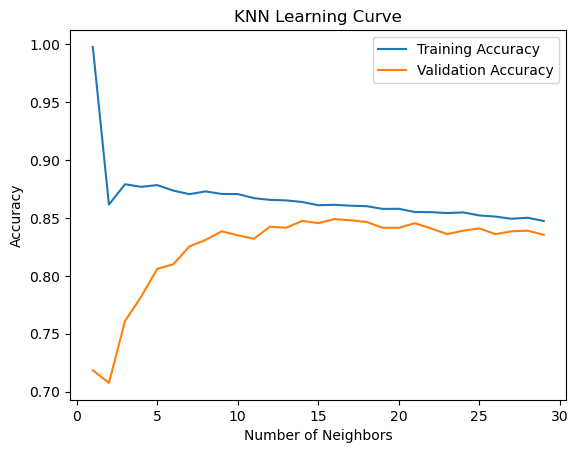

In [50]:
from sklearn.metrics import accuracy_score
neighbors = range(1, 30)
train_accuracy = []
val_accuracy = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    val_pred = knn.predict(X_validation)  
    train_accuracy.append(accuracy_score(y_train, train_pred))
    val_accuracy.append(accuracy_score(y_validation, val_pred))

# Plotting
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, val_accuracy, label='Validation Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Learning Curve')
plt.show()

Based on this plot, the optimal number of neighbors appears to be around where the validation accuracy curve is highest or before it starts to decline consistently. We might select a value around 10, as it seems to be in the middle of the plateau of the validation curve.

## With K value or Number of Neighbors as 16
On using the random search method we get "Best n_neighbors: {'n_neighbors': 16}" , therefore on using 16 number of neighbors in KNN classifire we get the following results:

In [21]:
# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [22]:
# Transform the validation text data
X_validation = vectorizer.transform(validation['cleaned_text'])
y_validation = validation['emotion']

# Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report
predictions = knn.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.849
              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       275
        fear       0.85      0.74      0.79       212
       happy       0.84      0.94      0.89       704
        love       0.93      0.56      0.70       178
         sad       0.82      0.93      0.87       550
    surprise       0.84      0.52      0.64        81

    accuracy                           0.85      2000
   macro avg       0.86      0.75      0.79      2000
weighted avg       0.85      0.85      0.84      2000



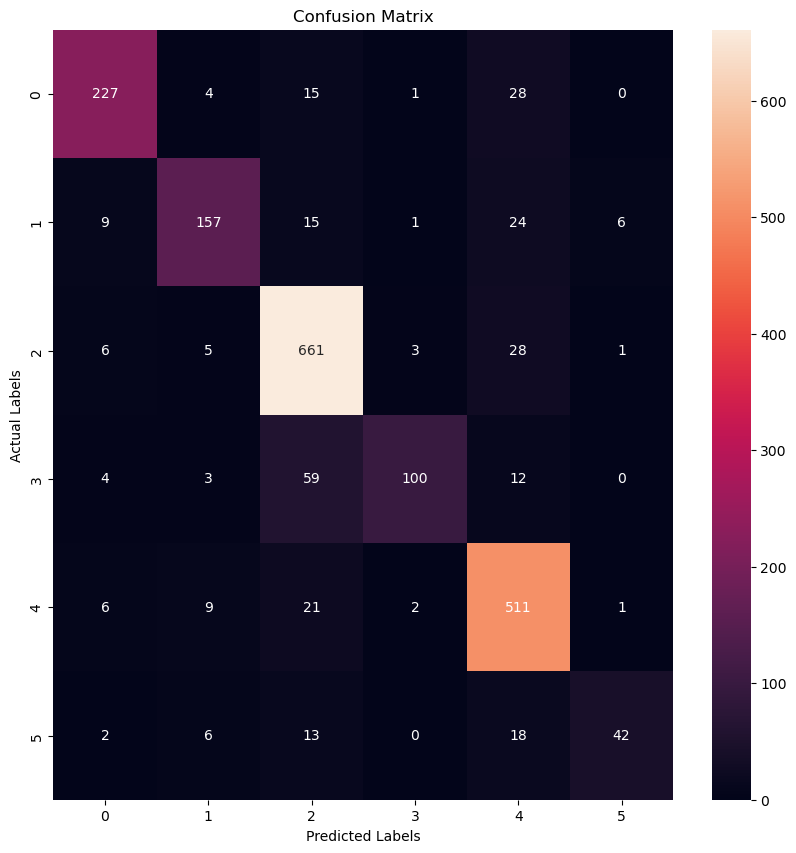

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# here y_validation is true labels and predictions is what our model predicted
cm = confusion_matrix(y_validation, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

## With K value or Number of Neighbors as 10
On using the larning curve method we get "Best n_neighbors: {'n_neighbors': 10}" , therefore on using 10 number of neighbors in KNN classifire we get the following results:

In [24]:
# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
# Transform the validation text data
X_validation = vectorizer.transform(validation['cleaned_text'])
y_validation = validation['emotion']

# Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report
predictions = knn.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.835
              precision    recall  f1-score   support

       anger       0.84      0.82      0.83       275
        fear       0.81      0.72      0.77       212
       happy       0.83      0.93      0.88       704
        love       0.89      0.58      0.70       178
         sad       0.83      0.89      0.86       550
    surprise       0.83      0.53      0.65        81

    accuracy                           0.83      2000
   macro avg       0.84      0.75      0.78      2000
weighted avg       0.84      0.83      0.83      2000



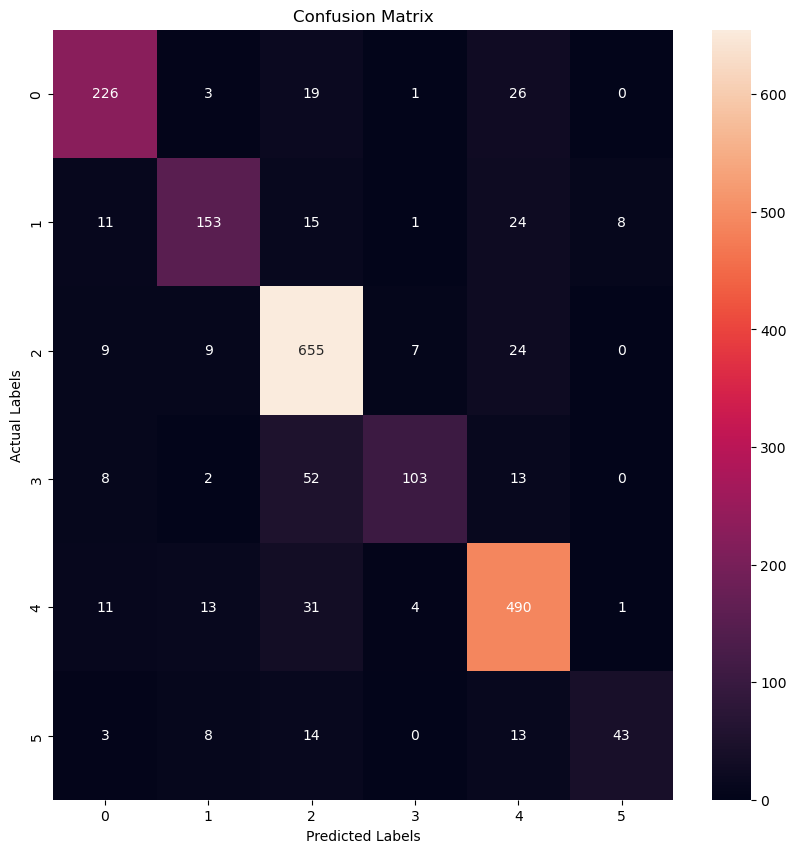

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# here y_validation is true labels and predictions is what our model predicted
cm = confusion_matrix(y_validation, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

## 7. Compare the Three Methods(Initial KNN with N= 5, Random Search method and Learning curve method)
To compare the results from the three methods (Initial KNN with n_neighbors=5, Random Search giving n_neighbors=16 and Learning Curve suggesting n_neighbors=10),we create a summary of the performance metrics and plot the comparison for easier visualization.

In [27]:
performance_metrics_16 = {
    'accuracy': 0.849,
    'precision': {
        'anger': 0.89,
        'fear': 0.85,
        'happy': 0.84,
        'love': 0.93,
        'sad': 0.82,
        'surprise': 0.84
    },
    'recall': {
        'anger': 0.83,
        'fear': 0.74,
        'happy': 0.94,
        'love': 0.56,
        'sad': 0.93,
        'surprise': 0.52
    },
    'f1-score': {
        'anger': 0.86,
        'fear': 0.79,
        'happy': 0.89,
        'love': 0.70,
        'sad': 0.87,
        'surprise': 0.64
    }
}

performance_metrics_10 = {
    'accuracy': 0.835,
    'precision': {
        'anger': 0.84,
        'fear': 0.81,
        'happy': 0.83,
        'love': 0.89,
        'sad': 0.83,
        'surprise': 0.83
    },
    'recall': {
        'anger': 0.82,
        'fear': 0.72,
        'happy': 0.93,
        'love': 0.58,
        'sad': 0.89,
        'surprise': 0.53
    },
    'f1-score': {
        'anger': 0.83,
        'fear': 0.77,
        'happy': 0.88,
        'love': 0.70,
        'sad': 0.86,
        'surprise': 0.65
    }
}
performance_metrics_5 = {
    'accuracy': 0.806,
    'precision': {
        'anger': 0.78,
        'fear': 0.72,
        'happy': 0.82,
        'love': 0.85,
        'sad': 0.82,
        'surprise': 0.80
    },
    'recall': {
        'anger': 0.84,
        'fear': 0.73,
        'happy': 0.87,
        'love': 0.57,
        'sad': 0.86,
        'surprise': 0.51
    },
    'f1-score': {
        'anger': 0.81,
        'fear': 0.72,
        'happy': 0.84,
        'love': 0.68,
        'sad': 0.84,
        'surprise': 0.62
    }
    
}


    

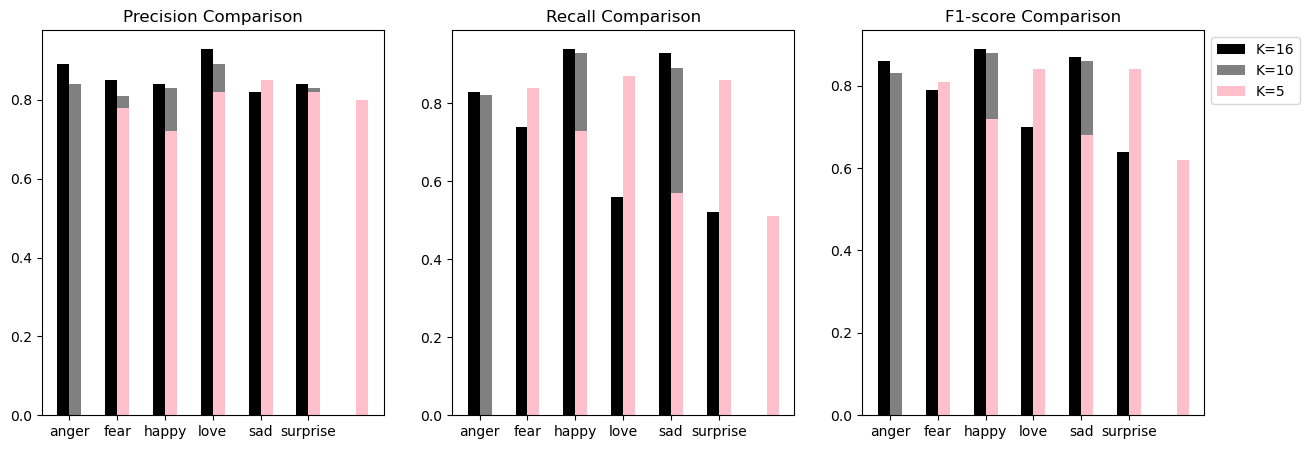

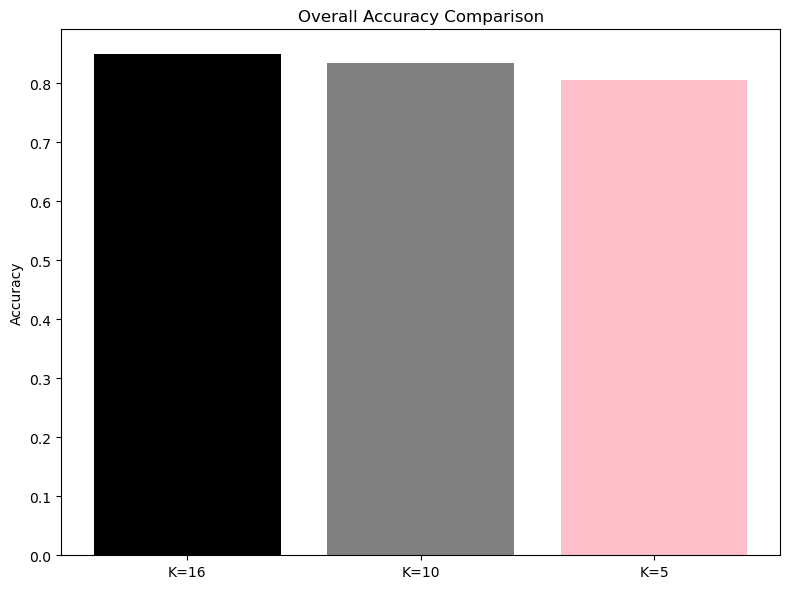

In [42]:
import numpy as np
# List of emotions
emotions = ['anger', 'fear', 'happy', 'love', 'sad', 'surprise']

# Metrics to plot
metrics = ['precision', 'recall', 'f1-score']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    scores_16 = [performance_metrics_16[metric][emotion] for emotion in emotions]
    scores_10 = [performance_metrics_10[metric][emotion] for emotion in emotions]
    scores_5 = [performance_metrics_5[metric][emotion] for emotion in emotions]
    
    bar_width = 0.25
    index = np.arange(len(emotions))
    
    axes[idx].bar(index, scores_16, bar_width, label='K=16', color='black')
    axes[idx].bar(index + bar_width, scores_10, bar_width, label='K=10', color='gray')
    axes[idx].bar(index + bar_width + 1, scores_5, bar_width, label='K=5', color='pink')
    
    axes[idx].set_title(f'{metric.capitalize()} Comparison')
    axes[idx].set_xticks(index + bar_width / 2)
    axes[idx].set_xticklabels(emotions)
    

# Overall accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(['K=16', 'K=10', 'K=5'], [performance_metrics_16['accuracy'], performance_metrics_10['accuracy'], performance_metrics_5['accuracy']], color=['black', 'gray', 'pink'])
plt.title('Overall Accuracy Comparison')
plt.ylabel('Accuracy')
axes[idx].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()